# Wasserstände von Seen abgleitet aus Satellitendaten

Die Wasserstände großer Seen sind ein Indikator für Schwankungen im hydrologischen Haushalt einer Region und werden als essentielle Klimavariable (Essential Climate Variable, ECV) eingestuft.

**Der Indikator ist für viele Einsatzfelder bedeutsam:**

* **Als Indikator für Niederschlags- und Verdunstungsänderungen**: Wasserstände reagieren auf Veränderungen in der Wasserbilanz eines Sees, die durch Niederschlag, Verdunstung und Abfluss bestimmt wird.
* **Zur Verknüpfung mit Temperaturtrends**: Steigende Temperaturen erhöhen die Verdunstung, was zu sinkenden Wasserständen führen kann.
* **Speicher in hydrologischen Kreisläufen und Wasserressourcen**: Seen sind bedeutende Süßwasserspeicher, und ihre Pegelstände beeinflussen die Trinkwasserversorgung, Landwirtschaft und Energieproduktion (z. B. Wasserkraft).
* **Direkter Einfluss auf Ökosysteme**: Änderungen der Wasserstände haben Auswirkungen auf aquatische und terrestrische Ökosysteme, z. B. durch veränderte Lebensräume für Flora und Fauna.
* **In der Verbindung mit Extremereignissen**: Wasserstände reagieren auf Dürren, Starkregenereignisse und Gletscherschmelze, was sie zu wichtigen Indikatoren für klimatische Extremereignisse macht.

Der Datensatz, den Sie in diesem Notebook bearbeiten liefert Wasserstandsinformationen für 251 Seen auf vier Kontinenten, abgeleitet aus satellitenbasierter Radaraltimetrie. Die Informationen stellen eine kostengünstige Alternative zu traditionellen bodengestützten Systemen dar Die Daten werden vom Copernicus Land Service (CLS) für den Copernicus Climate Change Service erstellt, um die hydrologische und klimatische Überwachung von Seen auf kontinentaler Ebene zu verbessern.

**In diesem Notebook sollen folgende Lernziele erarbeitet werden:**

* [Herunterladen und Entpacken des Datensatzes](#herunterladen-und-entpacken-des-datensatzes)
    * Extrahieren der Daten für den Bodensee
    * Entpacken der heruntergeladenen Datei
* [Untersuchen der Metadaten der netCDF4-Datei](#untersuchen-der-metadaten-der-netcdf4-datei)
* [Exportieren der Zeitreihe im csv-Format](#exportieren-der-zeitreihe-im-csv-format)
* [Analyse und Visualisierung Optionen](#analyse-und-visualisierung-optionen)

**Informationen zum Datensatz:**
* Quelle: <a href="https://cds.climate.copernicus.eu/datasets/satellite-lake-water-level?tab=overview" target="_blank">Satellite Lake Water Levels</a>
* Autor: T. Tewes (Stadt Konstanz)
* Notebook-Version: 1.4 (Aktualisiert: 17. Januar 2025)

---

Laden Sie bitte über den unten stehenden Link eine Kopie dieses Notebooks herunter, um es lokal auf Ihrem System auszuprobieren:

<div class="download-button"> <a href="/CoKLIMAx-II/jupyter_execute/notebooks/kurs2_einfache_cds/01-satellite-lake-water-level.ipynb" download>⇩ Satellite Lake Water Level</a> </div>

Öffnen Sie es nach dem Download in Jupyter Notebook und beginnen Sie mit der schrittweisen Ausführung des Codes.

---

## 1. Festlegen der Pfade und Arbeitsverzeichnisse

In [1]:
import os

''' ---- Verzeichnisse hier angeben ---- '''
download_folder = r".\data\satellite-lake-water-level\download"
working_folder = r".\data\satellite-lake-water-level\working"
geotiff_folder = r".\data\satellite-lake-water-level\geotiff"
csv_folder = r".\data\satellite-lake-water-level\csv"
output_folder = r".\data\satellite-lake-water-level\output"
''' ----- Ende der Angaben ---- '''

os.makedirs(download_folder, exist_ok=True)
os.makedirs(working_folder, exist_ok=True)
os.makedirs(geotiff_folder, exist_ok=True)
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

## 2. Herunterladen und Entpacken des Datensatzes

### 2.1 Authentifizierung

In [2]:
import cdsapi

def main():
    # API-Key für die Authentifizierung
    api_key = "fdae60fd-35d4-436f-825c-c63fedab94a4"
    api_url = "https://cds.climate.copernicus.eu/api"
    
    # Erstellung des CDS-API-Clients
    client = cdsapi.Client(url=api_url, key=api_key)
    return client

### 2.2 Definieren Sie die "request" und laden Sie den Datensatz herunter

In [3]:
# Definition des Datensatzes und der Request-Parameter
dataset = "satellite-lake-water-level"
request = {
    "variable": "all", 
    "region": ["southern_europe"],
    "lake": ["bodensee"]
}

In [4]:
# Führen Sie es aus, um den Datensatz herunterzuladen:
def main_retrieve():
    dataset_filename = f"{dataset}_bodensee.zip"
    dataset_filepath = os.path.join(download_folder, dataset_filename)

    # Den Datensatz nur herunterladen, wenn er noch nicht heruntergeladen wurde
    if not os.path.isfile(dataset_filepath):
        # Rufen Sie den CDS-Client nur auf, wenn der Datensatz noch nicht heruntergeladen wurde.
        client = main()
        # Den Datensatz mit den definierten Anforderungsparametern herunterladen
        client.retrieve(dataset, request, dataset_filepath)
    else:
        print("Datensatz bereits heruntergeladen.")

if __name__ == "__main__":
    main_retrieve()

Datensatz bereits heruntergeladen.


### 2.3 Extrahieren Sie die ZIP-Dateien in Ordner

In [5]:
import zipfile

# Erstellen des Dateinamens und des Dateipfads für die ZIP-Datei des Datensatzes
dataset_filename = f"{dataset}_bodensee.zip"
dataset_filepath = os.path.join(download_folder, dataset_filename)
extract_folder = working_folder

# Entpacken der ZIP-Datei
try:
    if not os.listdir(extract_folder):
        with zipfile.ZipFile(dataset_filepath, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"Dateien erfolgreich extrahiert nach: {extract_folder}")
    else:
        print("Ordner ist nicht leer. Entpacken überspringen.")
except FileNotFoundError:
    print(f"Fehler: Die Datei {dataset_filepath} wurde nicht gefunden.")
except zipfile.BadZipFile:
    print(f"Fehler: Die Datei {dataset_filepath} ist keine gültige ZIP-Datei.")
except Exception as e:
    print(f"Ein unerwarteter Fehler ist aufgetreten: {e}")

Ordner ist nicht leer. Entpacken überspringen.


## 3. Untersuchen der Metadaten der NetCDF4-Datei

In [6]:
import netCDF4 as nc

# Öffnen der NetCDF-Datei im Lesemodus
nc_filepath = os.path.join(extract_folder, os.listdir(extract_folder)[0])
nc_dataset = nc.Dataset(nc_filepath, mode='r')

# Auflisten aller Variablen im Datensatz
variables_list = nc_dataset.variables.keys()
print(f"Verfügbare Variablen: {list(variables_list)}")

Verfügbare Variablen: ['time', 'lat', 'lon', 'water_surface_height_above_reference_datum', 'water_surface_height_uncertainty']


In [7]:
import pandas as pd

# Variablennamen aus vorhandenen Variablen definieren und Variablendaten lesen
variable_name = 'water_surface_height_above_reference_datum'
variable_data = nc_dataset[variable_name]

# Erstellen einer Zusammenfassung der Hauptvariablen
summary = {
    "Variablenname": variable_name,
    "Datentyp": variable_data.dtype,
    "Form": variable_data.shape,
    "Variableninfo": f"{variable_data.dimensions}",
    "Einheiten": getattr(variable_data, "units", "N/A"),
    "Langer Name": getattr(variable_data, "long_name", "N/A"),
}

# Anzeigen der Zusammenfassung des Datensatzes als DataFrame zur besseren Visualisierung
nc_summary = pd.DataFrame(list(summary.items()), columns=['Beschreibung', 'Bemerkungen'])

# Anzeigen des Zusammenfassungs-DataFrames
nc_summary

,Beschreibung,Bemerkungen
0,Variablenname,water_surface_height_above_reference_datum
1,Datentyp,float64
2,Form,"(101,)"
3,Variableninfo,"('time',)"
4,Einheiten,m
5,Langer Name,water surface height above geoid


## 4. Exportieren der Zeitreihe im csv-Format

### 4.1 Definieren Sie eine Funktion zur Berechnung des Tagesdurchschnitts

In [8]:
import xarray as xr

# Funktion zur Umwandlung von NetCDF-Daten in ein Pandas DataFrame
def netcdf_to_dataframe(nc_file):
    """
    Konvertiert NetCDF-Daten, die die Höhe der Wasseroberfläche und deren Unsicherheit enthalten, 
    in ein Pandas DataFrame.

    Parameter:
    nc_file (str): Pfad zur NetCDF-Datei.

    Rückgabe:
    pd.DataFrame: Ein DataFrame mit der Höhe der Wasseroberfläche, der Unsicherheit 
                  und den zugehörigen Metadaten (z. B. Zeit- und Raumkoordinaten).
    """
    # Öffnen der NetCDF-Datei als xarray Dataset
    with xr.open_dataset(nc_file) as nc_dataset:
        # Extrahieren der Variablen für die Höhe der Wasseroberfläche über dem Referenzniveau
        variable_data_water_surface_height = nc_dataset['water_surface_height_above_reference_datum']

        # Extrahieren der Variablen für die Unsicherheit der Wasseroberflächenhöhe
        variable_data_water_surface_height_uncertainty = nc_dataset['water_surface_height_uncertainty']

        # Konvertieren des xarray Datasets in ein DataFrame
        df = variable_data_water_surface_height.to_dataframe()

        # Zusammenführen der Unsicherheitsdaten in das Haupt-DataFrame
        df['unsicherheit (m)'] = variable_data_water_surface_height_uncertainty.to_dataframe()

        return df

### 4.2 Erstellen des DataFrames und Export als CSV

In [9]:
# Definiere den CSV-Dateinamen und den Dateipfad für die Ausgabe
csv_filename = f"{dataset}.csv"
csv_filepath = os.path.join(csv_folder, csv_filename)

# Exportiere die Pivot-Tabelle als CSV, falls sie noch nicht existiert
if not os.path.isfile(csv_filepath):
    dataframe = netcdf_to_dataframe(nc_file=nc_filepath)
    dataframe.to_csv(csv_filepath, sep=',', encoding='utf8')
    print(f"Gefilterte Daten erfolgreich exportiert nach {csv_filepath}")

else:
    print(f"Datei existiert bereits unter {csv_filepath}.\nÜberspringe den Export.")
    print("Lese bestehende CSV-Datei ein...")
    # Lese die CSV-Datei mit Datums-Parsing
    dataframe = pd.read_csv(csv_filepath, parse_dates=['time'], index_col='time')

# Ändere die Pandas-Anzeigeoptionen
pd.options.display.float_format = '{:,.2f}'.format
    
# Zeige das DataFrame an
dataframe.head()

Datei existiert bereits unter .\data\satellite-lake-water-level\csv\satellite-lake-water-level.csv.
Überspringe den Export.
Lese bestehende CSV-Datei ein...


,water_surface_height_above_reference_datum,unsicherheit (m)
time,,
2016-03-23 20:43:59.997482240,394.44,0.29
2016-04-19 20:43:59.997482240,394.62,0.49
2016-05-16 20:44:59.998283264,395.41,0.21
2016-06-12 20:44:59.998283264,395.72,0.58
2016-07-09 20:44:59.998283264,396.13,0.13


In [10]:
# Suchen Sie die Indexbeschriftungen für die Maximal- und Minimalwerte
max_index_label = dataframe['water_surface_height_above_reference_datum'].idxmax()
min_index_label = dataframe['water_surface_height_above_reference_datum'].idxmin()

# Rufen Sie die Zeilen ab, die den Maximal- und Minimalwerten entsprechen
max_row = dataframe.loc[max_index_label]
min_row = dataframe.loc[min_index_label]

# Formatieren Sie die Indexbeschriftungen so, dass nur der Datumsteil angezeigt wird
max_date_str = max_index_label.strftime('%Y-%m-%d')
min_date_str = min_index_label.strftime('%Y-%m-%d')

# Drucken Sie die Ergebnisse
print(f"1. Maximale Höhe der Wasseroberfläche: ({max_date_str})")
print(max_row.to_frame().T.to_string(index=False))
print()

print(f"2. Mindesthöhe der Wasseroberfläche: ({min_date_str})")
print(min_row.to_frame().T.to_string(index=False))

1. Maximale Höhe der Wasseroberfläche: (2016-07-09)
 water_surface_height_above_reference_datum  unsicherheit (m)
                                     396.13              0.13

2. Mindesthöhe der Wasseroberfläche: (2017-02-10)
 water_surface_height_above_reference_datum  unsicherheit (m)
                                     393.69              1.08


## 5. Analyse und Visualisierung Optionen

### 5.1 Visualisierung aller Daten (ohne Karte)

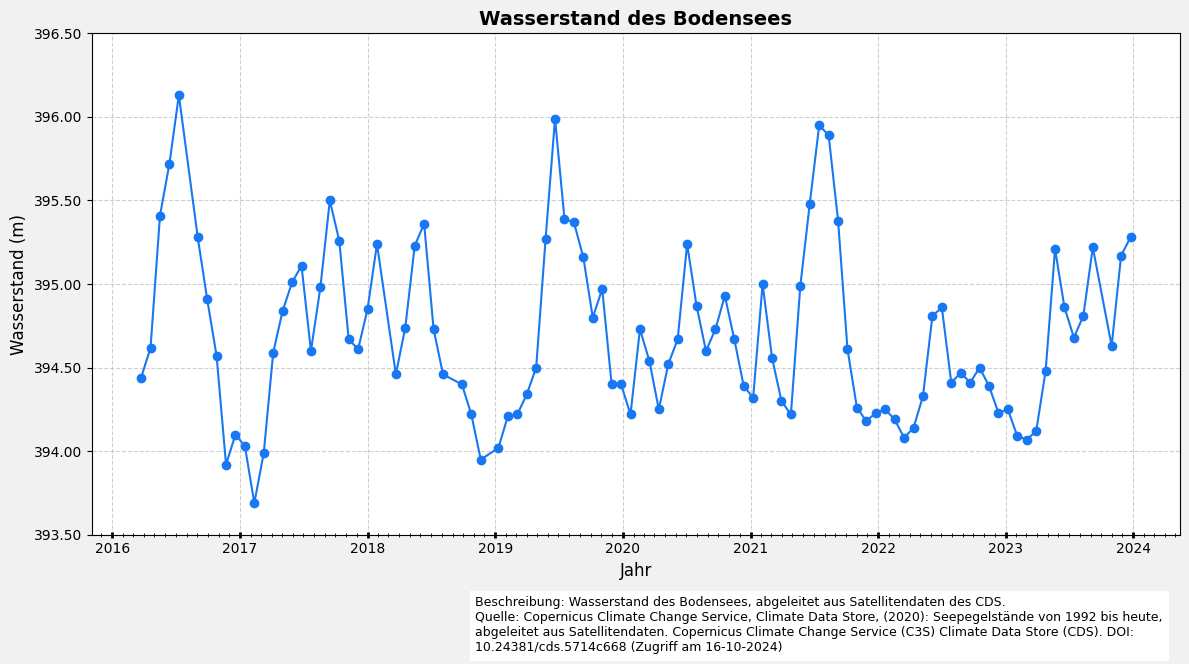

In [11]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
import matplotlib.ticker as ticker

# Erstelle die Figur und Achsen
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f1f1f1', edgecolor='k')

# Plotten der Wasserstandsdaten
ax.plot(
    dataframe.index,
    dataframe['water_surface_height_above_reference_datum'],
    marker='o',
    linestyle='-',
    color='#1877F2',
    label="Wasserstand",
)

# Formatieren der x-Achse für bessere Lesbarkeit
ax.xaxis.set_major_locator(YearLocator())  # Haupt-Ticks für jedes Jahr
ax.xaxis.set_minor_locator(MonthLocator())  # Kleine Ticks für jeden Monat
ax.xaxis.set_major_formatter(DateFormatter('%Y')) 
ax.tick_params(axis='x', which='major', length=4, direction='inout', width=2)
ax.tick_params(axis='x', which='minor', length=3, direction='inout')

# Setzen der y-Achsen-Grenzen
ax.set_ylim(393.5, 396.5)

# Setzen der Achsenbeschriftungen und Titel des Diagramms
ax.set_xlabel('Jahr', fontsize=12)
ax.set_ylabel('Wasserstand (m)', fontsize=12)
ax.set_title('Wasserstand des Bodensees', fontsize=14, fontweight='bold')

# Hinzufügen eines Rasters zum Diagramm und Formatierung der y-Achse
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Hinzufügen einer Beschreibung und Quelleninformation
plt.figtext(
    0.4,
    -0.05,
    (
        'Beschreibung: Wasserstand des Bodensees, abgeleitet aus Satellitendaten des CDS.\n'
        'Quelle: Copernicus Climate Change Service, Climate Data Store, (2020): Seepegelstände von 1992 '
        'bis heute, abgeleitet aus Satellitendaten. Copernicus Climate Change Service (C3S) Climate Data '
        'Store (CDS). DOI: 10.24381/cds.5714c668 (Zugriff am 16-10-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)

# Layout anpassen und das Diagramm anzeigen
plt.tight_layout()
plt.show()

### 5.2 Visualisierung der monatlichen Mittelwerte (ohne Karte)

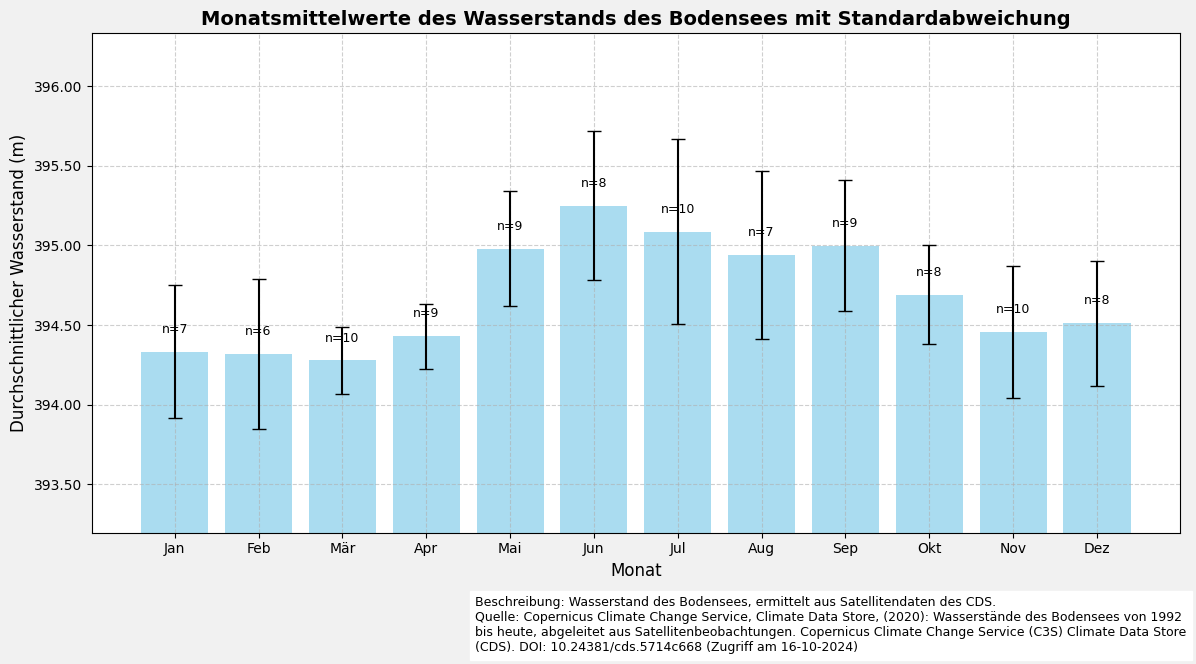

In [12]:
# Gruppiere die Daten nach Monat und berechne den Mittelwert, die Standardabweichung und die Stichprobengröße
monthly_data = dataframe.assign(month=dataframe.index.month).groupby('month')['water_surface_height_above_reference_datum']
# Berechne nun Mittelwert, Standardabweichung und Anzahl
monthly_mean = monthly_data.mean()
monthly_std = monthly_data.std()
monthly_n = monthly_data.count()

# Definiere die Monatsbezeichner und den entsprechenden Zahlenbereich
month_labels = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
months = range(1, 13)

# Erstelle das Balkendiagramm
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f1f1f1', edgecolor='k')

# Plotte Balken mit der Standardabweichung als Fehlerbalken
bars = ax.bar(
    months, 
    monthly_mean, 
    yerr=monthly_std, 
    capsize=5, 
    color='skyblue', 
    alpha=0.7, 
    error_kw=dict(ecolor='black', lw=1.5)
)

# Setze Achsenbezeichner und Diagrammtitel
y_min = max(0, monthly_mean.min() - monthly_std.max() - 0.5)
y_max = monthly_mean.max() + monthly_std.max() + 0.5
ax.set_ylim(y_min, y_max)

# Setze Achsenbezeichner und Diagrammtitel
ax.set_xlabel('Monat', fontsize=12)
ax.set_ylabel('Durchschnittlicher Wasserstand (m)', fontsize=12)
ax.set_title('Monatsmittelwerte des Wasserstands des Bodensees mit Standardabweichung', fontsize=14, fontweight='bold')

# Setze die X-Achsenbezeichner (1 = Januar, 12 = Dezember)
ax.set_xticks(months)
ax.set_xticklabels(month_labels)

# Füge Stichprobengröße (n) Annotationen über jedem Balken hinzu
for bar, n in zip(bars, monthly_n):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'n={n}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
    
# Füge ein Gitter zum Diagramm hinzu
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Füge eine Beschreibung und Quellenangabe hinzu
plt.figtext(
    0.4,
    -0.05,
    (
        'Beschreibung: Wasserstand des Bodensees, ermittelt aus Satellitendaten des CDS.\n'
        'Quelle: Copernicus Climate Change Service, Climate Data Store, (2020): Wasserstände des Bodensees von 1992 '
        'bis heute, abgeleitet aus Satellitenbeobachtungen. Copernicus Climate Change Service (C3S) Climate Data '
        'Store (CDS). DOI: 10.24381/cds.5714c668 (Zugriff am 16-10-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)

# Passe das Layout an und zeige das Diagramm an
plt.tight_layout()
plt.show()


### 5.3 Visualisierung aller Daten (mit Karte)

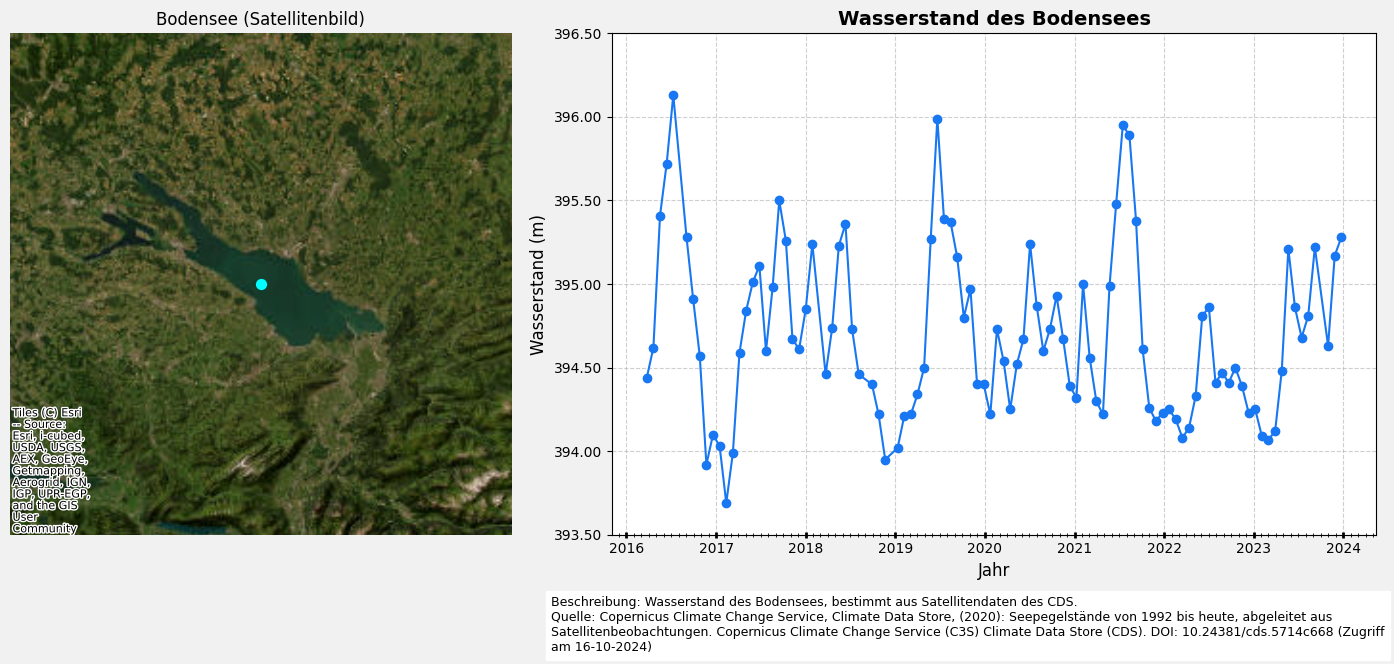

In [13]:
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx 

# Definiere den Punkt für den Bodensee (ungefähre Koordinaten)
bodensee_point = Point(nc_dataset['lon'][:][0], nc_dataset['lat'][:][0])

# Erstelle ein GeoDataFrame mit dem Bodensee-Punkt
lake_bodensee = gpd.GeoDataFrame(
    {'geometry': [bodensee_point]},
    crs='EPSG:4326' # WGS84-Koordinatensystem
)

# Projektiere in das Web Mercator Koordinatensystem
lake_bodensee = lake_bodensee.to_crs(epsg=3857)

# Erstelle die Figur und Achsen
fig, axs = plt.subplots(1,2, figsize=(14, 6),
                        facecolor='#f1f1f1',
                        edgecolor='k',
                        gridspec_kw={'width_ratios': [1, 1.5]})

# --- 1. Karte des Bodensees ---
ax = axs[0]
lake_bodensee.plot(ax=ax, color='cyan', markersize=50)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Passe den sichtbaren Bereich an (weiter herauszoomen)
# Erweitere den Bereich für mehr Umgebung (hier auf 100 km in jede Richtung)
# Erweitern Sie den Bereich in x-Richtung und y-Richtung
ax.set_xlim(lake_bodensee.geometry.x.min() - 80000, lake_bodensee.geometry.x.max() + 80000)
ax.set_ylim(lake_bodensee.geometry.y.min() - 80000, lake_bodensee.geometry.y.max() + 80000)

ax.set_title("Bodensee (Satellitenbild)")
ax.set_axis_off() # Entferne Achsenbeschriftungen

# --- 2. Diagramm des Wasserstands ---
ax = axs[1]

# Plotten der Wasserstandsdaten
ax.plot(
    dataframe.index,
    dataframe['water_surface_height_above_reference_datum'],
    marker='o',
    linestyle='-',
    color='#1877F2',
    label="Wasserstand",
)

# Formatieren der x-Achse für bessere Lesbarkeit
ax.xaxis.set_major_locator(YearLocator())  # Hauptmarkierungen für jedes Jahr
ax.xaxis.set_minor_locator(MonthLocator())  # Kleinere Markierungen für jeden Monat
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', which='major', length=4, direction='inout', width=2)
ax.tick_params(axis='x', which='minor', length=3, direction='inout')

# Setzen der y-Achsen-Grenzen
ax.set_ylim(393.5, 396.5)

# Setzen der Achsenbeschriftungen und Titel des Diagramms
ax.set_xlabel('Jahr', fontsize=12)
ax.set_ylabel('Wasserstand (m)', fontsize=12)
ax.set_title('Wasserstand des Bodensees', fontsize=14, fontweight='bold')

# Hinzufügen eines Rasters zum Diagramm und Formatierung der y-Achse
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Hinzufügen einer Beschreibung und Quelleninformation
plt.figtext(
    0.4,
    -0.05,
    (
        'Beschreibung: Wasserstand des Bodensees, bestimmt aus Satellitendaten des CDS.\n'
        'Quelle: Copernicus Climate Change Service, Climate Data Store, (2020): Seepegelstände von 1992 '
        'bis heute, abgeleitet aus Satellitenbeobachtungen. Copernicus Climate Change Service (C3S) Climate Data '
        'Store (CDS). DOI: 10.24381/cds.5714c668 (Zugriff am 16-10-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)

# Layout anpassen und das Diagramm anzeigen
plt.tight_layout()
plt.show()

### 5.4 Visualisierung der monatlichen Mittelwerte (mit Karte)

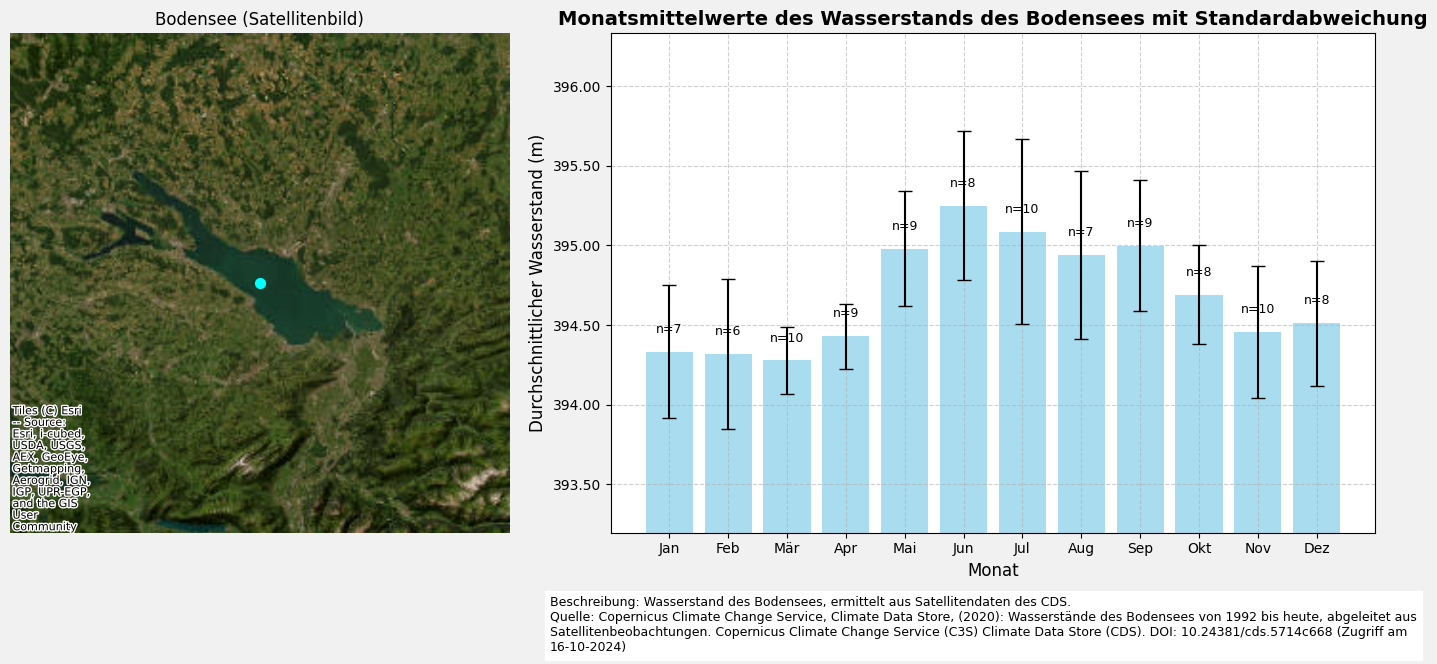

In [14]:
# Erstelle die Figur und Achsen
fig, axs = plt.subplots(1,2, figsize=(14, 6),
                        facecolor='#f1f1f1',
                        edgecolor='k',
                        gridspec_kw={'width_ratios': [1, 1.5]})

# --- 1. Karte des Bodensees ---
ax = axs[0]
lake_bodensee.plot(ax=ax, color='cyan', markersize=50)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Passe den sichtbaren Bereich an (weiter herauszoomen)
# Erweitere den Bereich für mehr Umgebung (hier auf 100 km in jede Richtung)
# Erweitern Sie den Bereich in x-Richtung und y-Richtung
ax.set_xlim(lake_bodensee.geometry.x.min() - 80000, lake_bodensee.geometry.x.max() + 80000)
ax.set_ylim(lake_bodensee.geometry.y.min() - 80000, lake_bodensee.geometry.y.max() + 80000)

ax.set_title("Bodensee (Satellitenbild)")
ax.set_axis_off() # Entferne Achsenbeschriftungen

# --- 2. Diagramm des Wasserstands ---
ax = axs[1]

# Plotte Balken mit der Standardabweichung als Fehlerbalken
bars = ax.bar(
    months, 
    monthly_mean, 
    yerr=monthly_std, 
    capsize=5, 
    color='skyblue', 
    alpha=0.7, 
    error_kw=dict(ecolor='black', lw=1.5)
)

# Setze Achsenbezeichner und Diagrammtitel
y_min = max(0, monthly_mean.min() - monthly_std.max() - 0.5)
y_max = monthly_mean.max() + monthly_std.max() + 0.5
ax.set_ylim(y_min, y_max)

# Setze Achsenbezeichner und Diagrammtitel
ax.set_xlabel('Monat', fontsize=12)
ax.set_ylabel('Durchschnittlicher Wasserstand (m)', fontsize=12)
ax.set_title('Monatsmittelwerte des Wasserstands des Bodensees mit Standardabweichung', fontsize=14, fontweight='bold')

# Setze die X-Achsenbezeichner (1 = Januar, 12 = Dezember)
ax.set_xticks(months)
ax.set_xticklabels(month_labels)

# Füge Stichprobengröße (n) Annotationen über jedem Balken hinzu
for bar, n in zip(bars, monthly_n):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.1,
        f'n={n}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
    
# Füge ein Gitter zum Diagramm hinzu
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Füge eine Beschreibung und Quellenangabe hinzu
plt.figtext(
    0.4,
    -0.05,
    (
        'Beschreibung: Wasserstand des Bodensees, ermittelt aus Satellitendaten des CDS.\n'
        'Quelle: Copernicus Climate Change Service, Climate Data Store, (2020): Wasserstände des Bodensees von 1992 '
        'bis heute, abgeleitet aus Satellitenbeobachtungen. Copernicus Climate Change Service (C3S) Climate Data '
        'Store (CDS). DOI: 10.24381/cds.5714c668 (Zugriff am 16-10-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)

# Passe das Layout an und zeige das Diagramm an
plt.tight_layout()
plt.show()